In [1]:
import pandas as pd#import library

In [3]:
df = pd.read_csv('Height-Weight Data.csv')#import Dataset

In [4]:
df.head()#default first 5 column show

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
df.tail()#default last 5 column show

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [6]:
df.shape#show dataset shape

(3501, 2)

In [7]:
import matplotlib.pyplot as plt#import library

In [8]:
import numpy as np#import library

Text(0, 0.5, 'Weight')

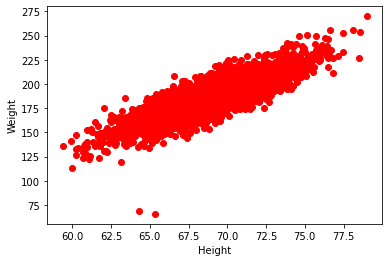

In [9]:
#Data Viz
plt.scatter(df['Height'],df['Weight'],color='red')
plt.xlabel('Height')
plt.ylabel('Weight')

In [10]:
df.Height.mean()#show mean value of Height

69.02441087268797

In [11]:
df.Weight.mean()

186.89125797946284

In [12]:
df['Weight'].mean()

186.89125797946284

In [13]:
x = df[['Height']]
y = df['Weight']

In [14]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [15]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

# splitting the dataset into the training set and test set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.25,random_state=42)

In [18]:
xtest.head()   # 25% for testing

,Height
211,70.324753
1454,67.271615
2176,69.142273
912,77.160801
921,72.676961


In [19]:
xtrain

,Height
2538,67.777637
2847,75.282847
2641,65.521633
366,72.987070
2172,68.166106
...,...
1095,67.068304
1130,66.892315
1294,67.129287
860,69.074492


In [20]:
ytrain

2538    191.498221
2847    219.113210
2641    159.936436
366     209.637975
2172    197.179570
           ...    
1095    187.573494
1130    186.204006
1294    177.719799
860     179.386817
3174    166.901515
Name: Weight, Length: 2625, dtype: float64

In [21]:
xtrain.shape

(2625, 1)

In [22]:
#fitting Linear Regration to the training set

from sklearn.linear_model import LinearRegression

In [23]:
reg=LinearRegression()#object creat for LinearRegression

In [24]:
reg.fit(xtrain,ytrain)#model train

LinearRegression()

In [25]:
reg.coef_

array([5.95677818])

In [26]:
reg.intercept_

-224.37950904042444

In [27]:
#y=mx+c
m=reg.coef_
c=reg.intercept_
x=78.00
y=m*x+c
y

array([240.24918886])

In [28]:
#Predicting the test set result
reg.predict([[78.00]])

array([240.24918886])

In [29]:
df['pred_weight']=reg.predict(df[['Height']])

In [30]:
df.head(20)

,Height,Weight,pred_weight
0,73.847017,241.893563,215.510790
1,68.781904,162.310473,185.339036
2,74.110105,212.740856,217.077950
3,71.730978,220.042470,202.906018
4,69.881796,206.349801,191.890848
5,67.253016,152.212156,176.231787
6,68.785081,183.927889,185.357962
7,68.348516,167.971111,182.757437
8,67.018950,175.929440,174.837508
9,63.456494,156.399676,153.616750


In [31]:
reg.score(xtest, ytest)# R squared value

0.7383400158579423

# best fet line

Text(0, 0.5, 'Weight')

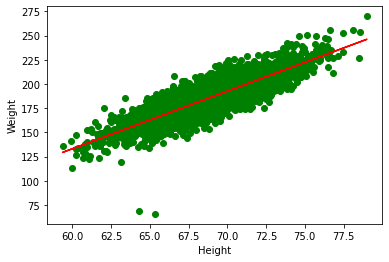

In [33]:
plt.plot(df["Height"], reg.predict(df[['Height']]), color='red')  # line plot

plt.scatter(df["Height"], df["Weight"], color="green")  #for scatter plotting, x-axis = Height, y-axis = Weight

plt.xlabel("Height")
plt.ylabel("Weight")

# Save ML models

In [35]:
import pickle as pk

with open('LRM_1', 'wb') as files:  # LRM_1 = file name,wb= written binary
    pk.dump(reg, files) # reg= model's object of LinearRegression

In [36]:
with open("LRM_1", "rb") as files:  # rb = read binary file
    model = pk.load(files)

In [37]:
model.predict([ [78.87] ])

array([245.43158588])

# in one line

In [39]:
pk.dump(reg, open('LRM_1', 'wb'))

In [42]:
model1 = pk.load(open('LRM_1', 'rb'))

In [43]:
model1.predict([ [78.87] ])

array([245.43158588])

# another way to Save ML models

In [45]:
import joblib as jb
jb.dump(reg, 'LRM_2')

['LRM_2']

In [47]:
model2 = jb.load('LRM_2')

In [48]:
model2.predict([ [78.87] ])

array([245.43158588])